# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data for power.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Check if there any missing data





In [5]:
if dataset.isnull().sum().sum() > 0:
    print("\nThe dataset contains missing values.")
else:
    print("\nThe dataset has no missing values.")


The dataset has no missing values.


## Explore_data





In [3]:
def explore_data(data):
    print("\nFirst 5 rows of the dataset:")
    print(data.head())
    print("\nDataset information:")
    print(data.info())
    print("\nSummary statistics:")
    print(data.describe())
    print("\nNumber of duplicate rows:", data.duplicated().sum())
    if data.duplicated().sum() > 0:
        print("\nDuplicate rows:")
        print(data[data.duplicated()])

In [4]:
explore_data(dataset)


First 5 rows of the dataset:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None

Summary statistics:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    1

## Training the Decision Tree Regression model on the Training set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


In [10]:
from sklearn.metrics import r2_score
print("\nR2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.922905874177941


## Evaluating the Model Performance

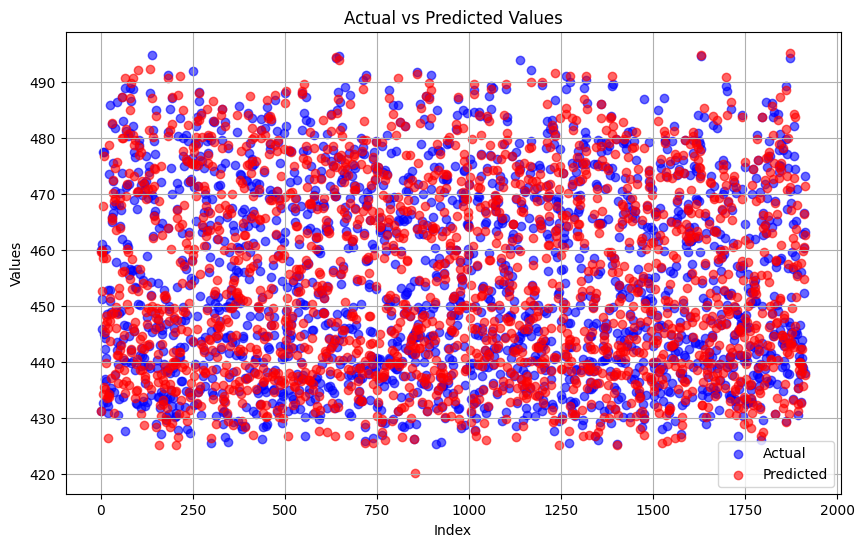

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()